393 evaluations required.


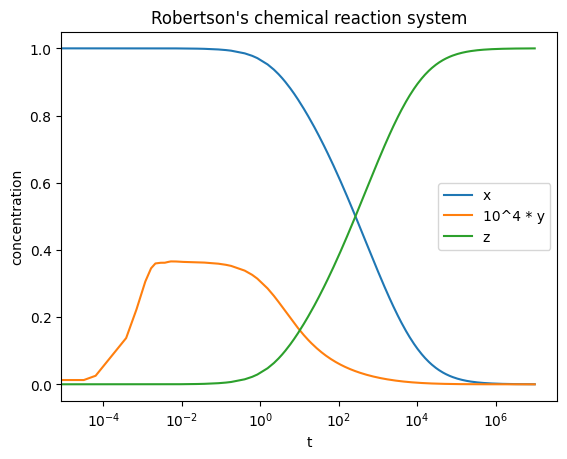

In [38]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def deriv(t, y):
    """ODEs for Robertson's chemical reaction system."""
    x, y, z = y
    xdot = -0.04 * x + 1.e4 * y * z
    ydot = 0.04 * x - 1.e4 * y * z - 3.e7 * y**2
    zdot = 3.e7 * y**2
    return xdot, ydot, zdot

# Initial and final times.
t0, tf = 0, 10000000
# Initial conditions: [X] = 1; [Y] = [Z] = 0.
y0 = 1, 0, 0
# Solve, using a method resilient to stiff ODEs.
soln = solve_ivp(deriv, (t0, tf), y0, method='BDF')
print(soln.nfev, 'evaluations required.')

# plot in log scale x axis
plt.figure()
plt.plot(soln.t, soln.y[0])
plt.plot(soln.t, 10**4 * soln.y[1])
plt.plot(soln.t, soln.y[2])
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend(['x', '10^4 * y', 'z'])
plt.title('Robertson\'s chemical reaction system')
plt.show()
